<h1>Instructions</h1>
<ol>
<li>Insert sample_username and sample_password(in 3rd cell)</li>
<li>Use stable internet Connection</li>   
<li>Run the whole kernel</li>
<li>Run in maximised mode only (Supports only maximize mode)</li> 
<ul>   

# Importing libraries

In [10]:
from selenium import webdriver
import time
from selenium.webdriver.support.select import Select
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException
from datetime import date
from datetime import timedelta 
import operator
from selenium.webdriver.support.ui import WebDriverWait
import csv
import matplotlib.pyplot as plt
import pandas as pd

# Intiating driver session

In [2]:
driver = webdriver.Chrome(executable_path = 'F:/chromedriver.exe')
#maximizing window
driver.maximize_window()
wait = WebDriverWait(driver,10)

# Opening the instagram and login by username and password

In [3]:
driver.get('https://www.instagram.com')
time.sleep(3)
username = wait.until(EC.presence_of_element_located((By.NAME,'username')))
username.send_keys('sample_username') # fill username
password = driver.find_element_by_name("password")
password.send_keys('sample_password')# fill password
password.submit()
time.sleep(5)
# turning off the notifications
driver.find_element_by_xpath('//button[contains(@class,"aOOlW   HoLwm ")]').click()
time.sleep(2)


# Searching food related instagram handles

In [4]:
#locating search_bar                                      
search_bar = driver.find_element_by_xpath('//input[contains(@class,"XTCLo x3qfX")]')
#extracting all the food related instagram handles and storing them for further use
search_bar.send_keys('food')
time.sleep(3)
options = driver.find_elements_by_class_name('Ap253')
food_handles = []
for i in options:
    if i.text[0] != '#' and ' ' not in i.text and i.text != "food":
        food_handles.append(i.text)
        #print(i.text)
driver.find_element_by_class_name('coreSpriteSearchClear').click()

# Finding the no. of followers of popular Instagram food handles 

In [5]:
page_and_followers = {}
separator = ''
count = 0
i = -1
while count < 10:
    i += 1
    search_bar = driver.find_element_by_xpath('//input[contains(@class,"XTCLo x3qfX")]')
    search_bar.send_keys(food_handles[i])
    time.sleep(3)
    wait.until(EC.presence_of_element_located((By.CLASS_NAME,'yCE8d'))).click()
    time.sleep(3)
    try:
        followers = driver.find_element_by_xpath('/html/body/div[1]/section/main/div/header/section/ul/li[2]/a/span').get_attribute('title')
        
    except NoSuchElementException:
        continue
    
    page_and_followers[food_handles[i]] =  int(separator.join(followers.split(',')))
    count += 1

# Finding Top5 food handles with maximum number of followers

In [6]:
page_and_followers_sorted = sorted(page_and_followers.items(), key=operator.itemgetter(1) ,reverse=True)
top5_food_handles= []
for i in range(5):
    top5_food_handles.append(page_and_followers_sorted[i])

# Extracting Date of last 3 days

In [11]:
last_3_dates = []
today = date.today() 
last_3_dates.append(str(today))
last_3_dates.append(str(today - timedelta(days = 1)))
last_3_dates.append(str(today - timedelta(days = 2)))
last_3_dates.append(str(today - timedelta(days = 3)))

# Number of posts by top5 food handles in previous 3 days

In [12]:
posts_in_last_3_days = {}
for i in top5_food_handles:
    search_bar = driver.find_element_by_xpath('//input[contains(@class,"XTCLo x3qfX")]')
    page_name = i[0]
    search_bar.send_keys(page_name)
    time.sleep(3)
    wait.until(EC.presence_of_element_located((By.CLASS_NAME,'yCE8d'))).click()
    time.sleep(3)
    posts_in_last_3_days[page_name] = 0
    try:
        #some pages don't have highlights so first post is present in section/main/div/div[2] instead of section/main/div/div[3]
        first_post = driver.find_element_by_xpath('//*[@id="react-root"]/section/main/div/div[3]/article/div[1]/div/div[1]/div[1]/a/div[1]/div[2]')
        first_post.click()
    except NoSuchElementException:
        first_post = driver.find_element_by_xpath('/html/body/div[1]/section/main/div/div[2]/article/div[1]/div/div[1]/div[1]/a/div[1]/div[2]') 
        first_post.click()    
    time.sleep(3)
    day_info =  wait.until(EC.presence_of_element_located((By.XPATH,'/html/body/div[4]/div[2]/div/article/div[2]/div[1]/ul/div/li/div/div/div[2]/div/div/time'))).get_attribute('datetime')
    day_info = day_info.split('T')[0]
    if day_info in last_3_dates:
        posts_in_last_3_days[page_name] += 1
    while True:
        wait.until(EC.presence_of_element_located((By.CLASS_NAME,"coreSpriteRightPaginationArrow"))).click()
        time.sleep(3)
        day_info =  wait.until(EC.presence_of_element_located((By.XPATH,"/html/body/div[4]/div[2]/div/article/div[2]/div[1]/ul/div/li/div/div/div[2]/div/div/time"))).get_attribute('datetime')
        day_info = day_info.split('T')[0]
        if day_info in last_3_dates:
            posts_in_last_3_days[page_name] += 1
        else:
            cross_btn = wait.until(EC.presence_of_element_located((By.XPATH,'/html/body/div[4]/div[3]/button')))
            cross_btn.click()
            time.sleep(2)
            break    

# Plotting Bar graph to show Number of posts by top 5 food handles in last 3 days

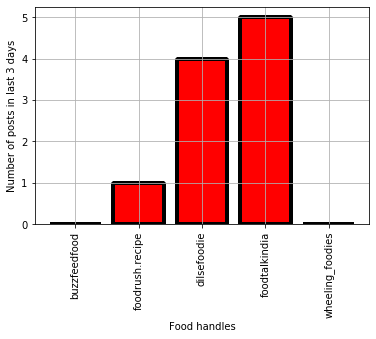

In [24]:
plt.bar(posts_in_last_3_days.keys(),posts_in_last_3_days.values(),color='red',edgecolor='black',linewidth=4,joinstyle='bevel')
plt.xlabel('Food handles')
plt.ylabel('Number of posts in last 3 days')
plt.grid()
plt.xticks(rotation = 90)
plt.show()

# Scraping the content of the first 10 posts of top5 food handle.


In [17]:
#this is cell is manily to extract the post's content so that user can have idea about post writing for food instagram handle 
#This cell can be removed while running the kernel 
data_of_first_10_posts = {}
for i in top5_food_handles:
    search_bar = driver.find_element_by_xpath('//input[contains(@class,"XTCLo x3qfX")]')
    page_name = i[0]
    search_bar.send_keys(page_name)
    time.sleep(3)
    wait.until(EC.presence_of_element_located((By.CLASS_NAME,'yCE8d'))).click()
    time.sleep(3)
    data_of_first_10_posts[page_name] = []
    try:
        #some pages don't have highlights so first post is present in section/main/div/div[2] instead of section/main/div/div[3]
        first_post = driver.find_element_by_xpath('//*[@id="react-root"]/section/main/div/div[3]/article/div[1]/div/div[1]/div[1]/a/div[1]/div[2]')
        first_post.click()
    except NoSuchElementException:
        first_post = driver.find_element_by_xpath('/html/body/div[1]/section/main/div/div[2]/article/div[1]/div/div[1]/div[1]/a/div[1]/div[2]') 
        first_post.click()    
    time.sleep(3)
    data = driver.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/div[2]/div[1]/ul/div/li/div/div/div[2]/span').get_attribute('textContent')
    data_of_first_10_posts[page_name].append(data)
    for j in range(9):
        wait.until(EC.presence_of_element_located((By.CLASS_NAME,"coreSpriteRightPaginationArrow"))).click()
        time.sleep(3)
        data = driver.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/div[2]/div[1]/ul/div/li/div/div/div[2]/span').get_attribute('textContent')
        data_of_first_10_posts[page_name].append(data)

    cross_btn = wait.until(EC.presence_of_element_located((By.XPATH,'/html/body/div[4]/div[3]/button')))
    cross_btn.click()
    time.sleep(2)


# Extracting hashtags and number of likes in first 10 posts of each handle

In [18]:
page_likes_and_hashtags = {}
for i in top5_food_handles:
    search_bar = driver.find_element_by_xpath('//input[contains(@class,"XTCLo x3qfX")]')
    page_name = i[0]
    search_bar.send_keys(page_name)
    time.sleep(3)
    wait.until(EC.presence_of_element_located((By.CLASS_NAME,'yCE8d'))).click()
    time.sleep(3)
    page_likes_and_hashtags[page_name] = {'Likes':[], 'Hashtags':[]}
    try:
        #some pages don't have highlights so first post is present in section/main/div/div[2] instead of section/main/div/div[3]
        first_post = driver.find_element_by_xpath('//*[@id="react-root"]/section/main/div/div[3]/article/div[1]/div/div[1]/div[1]/a/div[1]/div[2]')
        first_post.click()
    except NoSuchElementException:
        first_post = driver.find_element_by_xpath('/html/body/div[1]/section/main/div/div[2]/article/div[1]/div/div[1]/div[1]/a/div[1]/div[2]') 
        first_post.click()    
    time.sleep(3)
    try:
        #location is different for images and videos
        likes = driver.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/div[2]/section[2]/div/span/span').get_attribute('innerHTML')
        likes = int(separator.join(likes.split(',')))
    except NoSuchElementException:  
        likes = driver.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/div[2]/section[2]/div/div/button/span').get_attribute('innerHTML')
        likes = int(separator.join(likes.split(',')))
    page_likes_and_hashtags[page_name]['Likes'].append((1,likes))
    hashtags = driver.find_elements_by_xpath('/html/body/div[4]/div[2]/div/article/div[2]/div[1]/ul/div/li/div/div/div[2]/span/a')
    for k in hashtags:
        text = k.get_attribute('innerHTML')
        if text[0] != '@':
            page_likes_and_hashtags[page_name]['Hashtags'].append(text)
    for j in range(9):
        wait.until(EC.presence_of_element_located((By.CLASS_NAME,"coreSpriteRightPaginationArrow"))).click()
        time.sleep(3)
        try:
            #location is different for images and videos
            likes = driver.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/div[2]/section[2]/div/span/span').get_attribute('innerHTML')
            likes = int(separator.join(likes.split(',')))
        except NoSuchElementException:  
            likes = driver.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/div[2]/section[2]/div/div/button/span').get_attribute('innerHTML')
            likes = int(separator.join(likes.split(',')))
        page_likes_and_hashtags[page_name]['Likes'].append((j + 1,likes))
        hashtags = driver.find_elements_by_xpath('/html/body/div[4]/div[2]/div/article/div[2]/div[1]/ul/div/li/div/div/div[2]/span/a')                                         
        for k in hashtags:
            text = k.get_attribute('innerHTML')
            if text[0] != '@':
                page_likes_and_hashtags[page_name]['Hashtags'].append(text)

    cross_btn = wait.until(EC.presence_of_element_located((By.XPATH,'/html/body/div[4]/div[3]/button')))
    cross_btn.click()
    time.sleep(2)
        
    

# Top 5 Food Hashtags

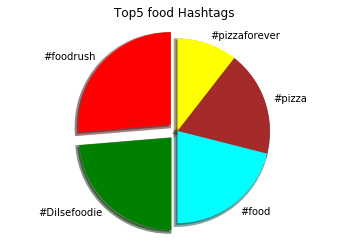

In [19]:
all_food_hashtags = {}
for i in page_likes_and_hashtags:
    temp = page_likes_and_hashtags[i]['Hashtags']
    for j in temp:
        all_food_hashtags[j] = all_food_hashtags.get(j, 0) + 1
all_food_hashtags_sorted =  sorted(all_food_hashtags.items(), key=operator.itemgetter(1) ,reverse=True)   
top5_food_hashtags = {}
for i in range(5):
    top5_food_hashtags[all_food_hashtags_sorted[i][0]] = all_food_hashtags_sorted[i][1]
    
plt.pie(top5_food_hashtags.values(), colors = ["red","green","cyan","brown","yellow"],wedgeprops = {'linewidth': 4},explode = (0.1, 0.1, 0.0, 0.0, 0),labels = top5_food_hashtags,shadow=True, startangle=90)
plt.axis("equal")
plt.title("Top5 food Hashtags")
plt.show()
    

# Storing the Hashtags with their frequency in csv file

In [20]:
df = pd.DataFrame(all_food_hashtags_sorted, columns = ['Hashtags', 'Frequency'])
df= df.drop(0)
df.to_csv('F:/Hashtags_for_food_handles.csv')# User can change it accordingly

# Average Likes for each food handle based upon first 10 posts

In [21]:
average_likes_for_food_handle = {}
for i in page_likes_and_hashtags:
    average_likes_for_food_handle[i] = 0
    for j in page_likes_and_hashtags[i]['Likes']:
        average_likes_for_food_handle[i] += j[1]
    average_likes_for_food_handle[i] = average_likes_for_food_handle[i]//10
    

# Calculating Followers:Likes Ratio for each handle

In [22]:
average_follower_like_ratio = {}
for i in average_likes_for_food_handle:
    average_follower_like_ratio[i] = page_and_followers[i]//average_likes_for_food_handle[i]


# Bar graph to depict the Followers:Likes Ratio for Top5 Food Handles

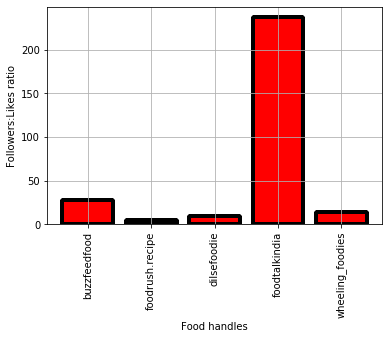

In [25]:
plt.bar(average_follower_like_ratio.keys(),average_follower_like_ratio.values(),color='red',edgecolor='black',linewidth=4,joinstyle='bevel')
plt.xlabel('Food handles')
plt.ylabel('Followers:Likes ratio')
plt.grid()
plt.xticks(rotation = 90)
plt.show()